In [1]:
from keras import layers
from keras import models
from keras import losses
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/home/yaagocruuz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = models.Sequential()
model.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model.add(layers.Dense(units= 64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels) #Converts a class vector (integers) to binary class matrix.
test_labels = to_categorical(test_labels)

In [7]:
X_train = train_images[:6000, :, :]
X_train_labels = train_labels[:6000, :]

X_valid = train_images[6000:7000, :, :]
X_valid_labels= train_labels[6000:7000, :]

X_test = test_images[:1000, :, :]
X_test_labels = test_labels[:1000, :]

In [8]:
print(X_train.shape)

(6000, 28, 28, 1)


In [9]:
print(X_train_labels.shape)

(6000, 10)


In [11]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 829us/step - loss: 0.8316 - acc: 0.7323 - val_loss: 0.4751 - val_acc: 0.8430
Epoch 2/10
6000/6000 [==============================] - 4s 665us/step - loss: 0.2801 - acc: 0.9190 - val_loss: 0.3029 - val_acc: 0.9110
Epoch 3/10
6000/6000 [==============================] - 4s 707us/step - loss: 0.1789 - acc: 0.9467 - val_loss: 0.1961 - val_acc: 0.9440
Epoch 4/10
6000/6000 [==============================] - 4s 669us/step - loss: 0.1316 - acc: 0.9610 - val_loss: 0.1706 - val_acc: 0.9520
Epoch 5/10
6000/6000 [==============================] - 4s 748us/step - loss: 0.0925 - acc: 0.9745 - val_loss: 0.1321 - val_acc: 0.9630
Epoch 6/10
6000/6000 [==============================] - 4s 696us/step - loss: 0.0761 - acc: 0.9782 - val_loss: 0.0922 - val_acc: 0.9730
Epoch 7/10
6000/6000 [==============================] - 4s 700us/step - loss: 0.0617 - acc: 0.9790 - val_loss: 0.0860 - val_acc: 0.9750


In [12]:
test_loss, test_acc = model.evaluate(X_test, X_test_labels)
test_acc

1000/1000 [==============================] - 0s 358us/step


0.978

## Primeiro modelo : logarithmic_error

In [13]:
model1 = models.Sequential()
model1.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

In [14]:
model1.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model1.add(layers.Dense(units= 64, activation='relu'))
model1.add(layers.Dense(units=10, activation='softmax'))

In [15]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels) #Converts a class vector (integers) to binary class matrix.
test_labels = to_categorical(test_labels)

In [16]:
X_train = train_images[:6000, :, :]
X_train_labels = train_labels[:6000, :]

X_valid = train_images[6000:7000, :, :]
X_valid_labels= train_labels[6000:7000, :]

X_test = test_images[:1000, :, :]
X_test_labels = test_labels[:1000, :]

In [17]:
model1.compile(optimizer=optimizers.adagrad(),
loss=losses.mean_squared_logarithmic_error,
metrics=['accuracy'])
history1 = model1.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 4s 723us/step - loss: 0.0191 - acc: 0.7102 - val_loss: 0.0050 - val_acc: 0.9380
Epoch 2/10
6000/6000 [==============================] - 4s 697us/step - loss: 0.0044 - acc: 0.9422 - val_loss: 0.0031 - val_acc: 0.9600
Epoch 3/10
6000/6000 [==============================] - 4s 637us/step - loss: 0.0030 - acc: 0.9622 - val_loss: 0.0032 - val_acc: 0.9570
Epoch 4/10
6000/6000 [==============================] - 4s 706us/step - loss: 0.0024 - acc: 0.9710 - val_loss: 0.0022 - val_acc: 0.9750
Epoch 5/10
6000/6000 [==============================] - 5s 755us/step - loss: 0.0021 - acc: 0.9733 - val_loss: 0.0027 - val_acc: 0.9600
Epoch 6/10
6000/6000 [==============================] - 5s 763us/step - loss: 0.0018 - acc: 0.9795 - val_loss: 0.0022 - val_acc: 0.9700
Epoch 7/10
6000/6000 [==============================] - 5s 764us/step - loss: 0.0015 - acc: 0.9838 - val_loss: 0.0028 - val_acc: 0.9600


In [18]:
test_loss_le1, test_acc_le1 = model1.evaluate(X_test, X_test_labels)
test_acc_le1

1000/1000 [==============================] - 0s 348us/step


0.972

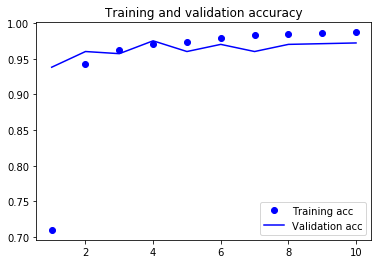

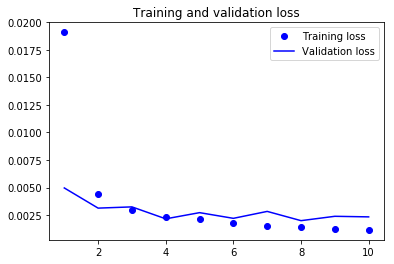

In [19]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
model2 = models.Sequential()
model2.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model2.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model2.add(layers.Dense(units= 64, activation='relu'))
model2.add(layers.Dense(units=10, activation='softmax'))

In [23]:
model2.compile(optimizer=optimizers.nadam(),
loss=losses.mean_squared_logarithmic_error,
metrics=['accuracy'])
history2 = model2.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 800us/step - loss: 0.0151 - acc: 0.7698 - val_loss: 0.0045 - val_acc: 0.9460
Epoch 2/10
6000/6000 [==============================] - 4s 649us/step - loss: 0.0034 - acc: 0.9562 - val_loss: 0.0026 - val_acc: 0.9660
Epoch 3/10
6000/6000 [==============================] - 4s 677us/step - loss: 0.0025 - acc: 0.9700 - val_loss: 0.0031 - val_acc: 0.9580
Epoch 4/10
6000/6000 [==============================] - 5s 768us/step - loss: 0.0021 - acc: 0.9720 - val_loss: 0.0023 - val_acc: 0.9690
Epoch 5/10
6000/6000 [==============================] - 5s 765us/step - loss: 0.0019 - acc: 0.9757 - val_loss: 0.0024 - val_acc: 0.9680
Epoch 6/10
6000/6000 [==============================] - 5s 773us/step - loss: 0.0014 - acc: 0.9832 - val_loss: 0.0026 - val_acc: 0.9660
Epoch 7/10
6000/6000 [==============================] - 4s 724us/step - loss: 0.0013 - acc: 0.9830 - val_loss: 0.0041 - val_acc: 0.9470


In [24]:
test_loss_le2, test_acc_le2 = model2.evaluate(X_test, X_test_labels)
test_acc_le2

1000/1000 [==============================] - 0s 417us/step


0.918

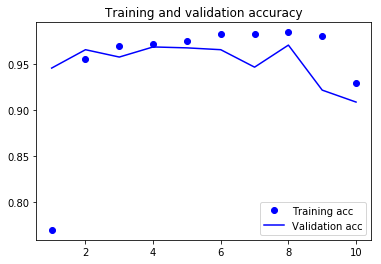

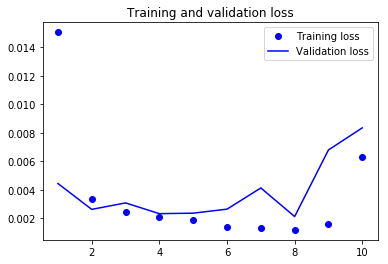

In [25]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
model3 = models.Sequential()
model3.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model3.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model3.add(layers.Dense(units= 64, activation='relu'))
model3.add(layers.Dense(units=10, activation='softmax'))

In [30]:
model3.compile(optimizer=optimizers.SGD(),
loss=losses.mean_squared_logarithmic_error,
metrics=['accuracy'])
history3 = model3.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 4s 734us/step - loss: 0.0438 - acc: 0.1808 - val_loss: 0.0438 - val_acc: 0.1770
Epoch 2/10
6000/6000 [==============================] - 4s 665us/step - loss: 0.0438 - acc: 0.1880 - val_loss: 0.0437 - val_acc: 0.1820
Epoch 3/10
6000/6000 [==============================] - 4s 704us/step - loss: 0.0437 - acc: 0.1950 - val_loss: 0.0437 - val_acc: 0.1860
Epoch 4/10
6000/6000 [==============================] - 4s 735us/step - loss: 0.0437 - acc: 0.2013 - val_loss: 0.0437 - val_acc: 0.1930
Epoch 5/10
6000/6000 [==============================] - 4s 748us/step - loss: 0.0437 - acc: 0.2075 - val_loss: 0.0437 - val_acc: 0.1960
Epoch 6/10
6000/6000 [==============================] - 5s 764us/step - loss: 0.0437 - acc: 0.2123 - val_loss: 0.0437 - val_acc: 0.2010
Epoch 7/10
6000/6000 [==============================] - 5s 764us/step - loss: 0.0437 - acc: 0.2183 - val_loss: 0.0437 - val_acc: 0.2040


In [31]:
test_loss_le3, test_acc_le3 = model3.evaluate(X_test, X_test_labels)
test_acc_le3

1000/1000 [==============================] - 0s 358us/step


0.235

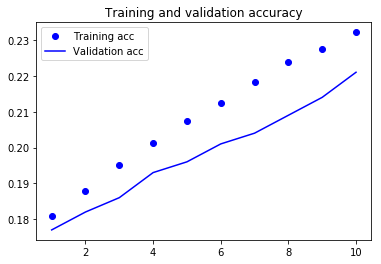

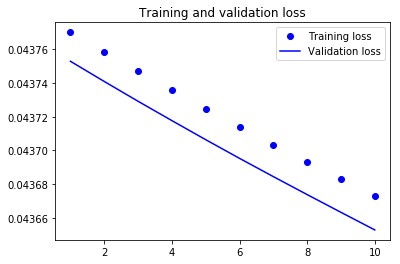

In [32]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Segundo modelo: hinge

In [33]:
model4 = models.Sequential()
model4.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model4.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model4.add(layers.Dense(units= 64, activation='relu'))
model4.add(layers.Dense(units=10, activation='softmax'))

In [37]:
model4.compile(optimizer=optimizers.adagrad(),
loss=losses.hinge,
metrics=['accuracy'])
history4 = model4.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 752us/step - loss: 0.9319 - acc: 0.6832 - val_loss: 0.9225 - val_acc: 0.7790
Epoch 2/10
6000/6000 [==============================] - 4s 675us/step - loss: 0.9209 - acc: 0.7923 - val_loss: 0.9212 - val_acc: 0.7890
Epoch 3/10
6000/6000 [==============================] - 4s 706us/step - loss: 0.9199 - acc: 0.8020 - val_loss: 0.9210 - val_acc: 0.7920
Epoch 4/10
6000/6000 [==============================] - 5s 781us/step - loss: 0.9198 - acc: 0.8042 - val_loss: 0.9212 - val_acc: 0.7890
Epoch 5/10
6000/6000 [==============================] - 4s 742us/step - loss: 0.9195 - acc: 0.8055 - val_loss: 0.9213 - val_acc: 0.7870
Epoch 6/10
6000/6000 [==============================] - 4s 712us/step - loss: 0.9193 - acc: 0.8085 - val_loss: 0.9209 - val_acc: 0.7920
Epoch 7/10
6000/6000 [==============================] - 5s 814us/step - loss: 0.9170 - acc: 0.8317 - val_loss: 0.9135 - val_acc: 0.8680


In [38]:
test_loss_le4, test_acc_le4 = model4.evaluate(X_test, X_test_labels)
test_acc_le4

1000/1000 [==============================] - 0s 384us/step


0.88

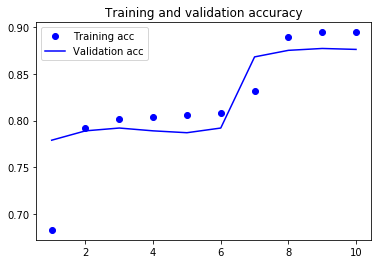

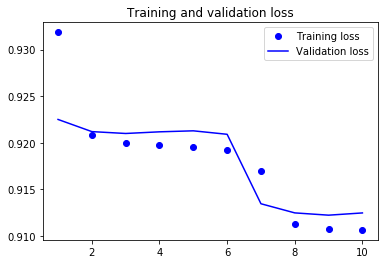

In [39]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [40]:
model5 = models.Sequential()
model5.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model5.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model5.add(layers.Dense(units= 64, activation='relu'))
model5.add(layers.Dense(units=10, activation='softmax'))

In [41]:
model5.compile(optimizer=optimizers.nadam(),
loss=losses.hinge,
metrics=['accuracy'])
history5 = model5.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.9537 - acc: 0.4693 - val_loss: 0.9421 - val_acc: 0.5790
Epoch 2/10
6000/6000 [==============================] - 5s 814us/step - loss: 0.9433 - acc: 0.5668 - val_loss: 0.9423 - val_acc: 0.5780
Epoch 3/10
6000/6000 [==============================] - 5s 754us/step - loss: 0.9420 - acc: 0.5802 - val_loss: 0.9417 - val_acc: 0.5800
Epoch 4/10
6000/6000 [==============================] - 5s 809us/step - loss: 0.9434 - acc: 0.5663 - val_loss: 0.9475 - val_acc: 0.5250
Epoch 5/10
6000/6000 [==============================] - 5s 888us/step - loss: 0.9499 - acc: 0.5010 - val_loss: 0.9440 - val_acc: 0.5610
Epoch 6/10
6000/6000 [==============================] - 6s 1ms/step - loss: 0.9480 - acc: 0.5197 - val_loss: 0.9429 - val_acc: 0.5710
Epoch 7/10
6000/6000 [==============================] - 6s 917us/step - loss: 0.9457 - acc: 0.5428 - val_loss: 0.9635 - val_acc: 0.3650
Epoc

In [42]:
test_loss_le5, test_acc_le5 = model5.evaluate(X_test, X_test_labels)
test_acc_le5

1000/1000 [==============================] - 0s 302us/step


0.197

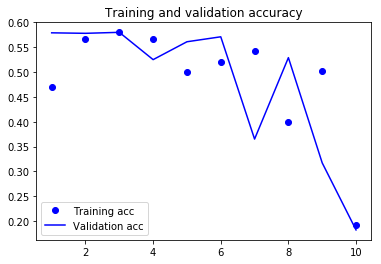

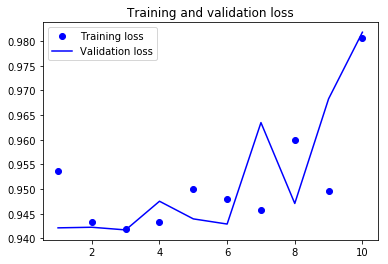

In [43]:
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [44]:
model6 = models.Sequential()
model6.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model6.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model6.add(layers.Dense(units= 64, activation='relu'))
model6.add(layers.Dense(units=10, activation='softmax'))

In [45]:
model6.compile(optimizer=optimizers.SGD(),
loss=losses.hinge,
metrics=['accuracy'])
history6 = model6.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 811us/step - loss: 0.9900 - acc: 0.0415 - val_loss: 0.9900 - val_acc: 0.0430
Epoch 2/10
6000/6000 [==============================] - 4s 707us/step - loss: 0.9900 - acc: 0.0430 - val_loss: 0.9900 - val_acc: 0.0450
Epoch 3/10
6000/6000 [==============================] - 4s 701us/step - loss: 0.9900 - acc: 0.0437 - val_loss: 0.9900 - val_acc: 0.0460
Epoch 4/10
6000/6000 [==============================] - 5s 852us/step - loss: 0.9900 - acc: 0.0452 - val_loss: 0.9900 - val_acc: 0.0480
Epoch 5/10
6000/6000 [==============================] - 4s 676us/step - loss: 0.9900 - acc: 0.0478 - val_loss: 0.9900 - val_acc: 0.0490
Epoch 6/10
6000/6000 [==============================] - 4s 648us/step - loss: 0.9900 - acc: 0.0497 - val_loss: 0.9900 - val_acc: 0.0500
Epoch 7/10
6000/6000 [==============================] - 4s 646us/step - loss: 0.9900 - acc: 0.0512 - val_loss: 0.9900 - val_acc: 0.0550


In [46]:
test_loss_le6, test_acc_le6 = model6.evaluate(X_test, X_test_labels)
test_acc_le6

1000/1000 [==============================] - 0s 297us/step


0.064

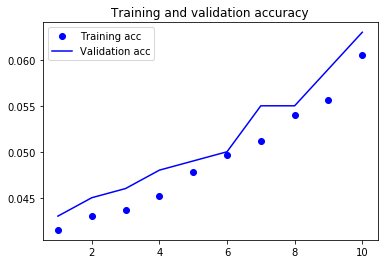

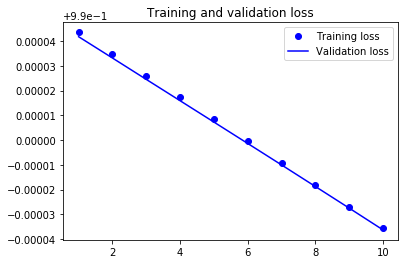

In [47]:
acc = history6.history['acc']
val_acc = history6.history['val_acc']
loss = history6.history['loss']
val_loss = history6.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Terceiro modelo: poisson

In [48]:
model7 = models.Sequential()
model7.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model7.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model7.add(layers.Dense(units= 64, activation='relu'))
model7.add(layers.Dense(units=10, activation='softmax'))

In [49]:
model7.compile(optimizer=optimizers.adagrad(),
loss=losses.poisson,
metrics=['accuracy'])
history7 = model7.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 4s 748us/step - loss: 0.2320 - acc: 0.7010 - val_loss: 0.1269 - val_acc: 0.9130
Epoch 2/10
6000/6000 [==============================] - 4s 655us/step - loss: 0.1224 - acc: 0.9338 - val_loss: 0.1167 - val_acc: 0.9500
Epoch 3/10
6000/6000 [==============================] - 4s 651us/step - loss: 0.1149 - acc: 0.9530 - val_loss: 0.1151 - val_acc: 0.9510
Epoch 4/10
6000/6000 [==============================] - 4s 642us/step - loss: 0.1117 - acc: 0.9650 - val_loss: 0.1125 - val_acc: 0.9620
Epoch 5/10
6000/6000 [==============================] - 4s 662us/step - loss: 0.1096 - acc: 0.9717 - val_loss: 0.1120 - val_acc: 0.9620
Epoch 6/10
6000/6000 [==============================] - 4s 648us/step - loss: 0.1082 - acc: 0.9765 - val_loss: 0.1173 - val_acc: 0.9530
Epoch 7/10
6000/6000 [==============================] - 4s 643us/step - loss: 0.1072 - acc: 0.9785 - val_loss: 0.1110 - val_acc: 0.9650


In [50]:
test_loss_le7, test_acc_le7 = model7.evaluate(X_test, X_test_labels)
test_acc_le7

1000/1000 [==============================] - 0s 308us/step


0.967

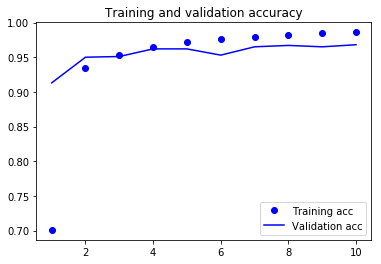

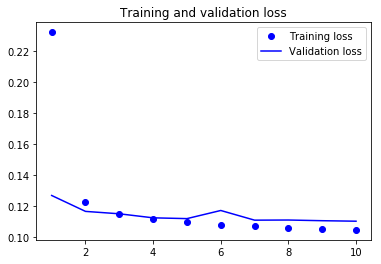

In [51]:
acc = history7.history['acc']
val_acc = history7.history['val_acc']
loss = history7.history['loss']
val_loss = history7.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [52]:
model8 = models.Sequential()
model8.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model8.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model8.add(layers.Dense(units= 64, activation='relu'))
model8.add(layers.Dense(units=10, activation='softmax'))

In [53]:
model8.compile(optimizer=optimizers.nadam(),
loss=losses.poisson,
metrics=['accuracy'])
history8 = model8.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 827us/step - loss: 0.1647 - acc: 0.7977 - val_loss: 0.1171 - val_acc: 0.9580
Epoch 2/10
6000/6000 [==============================] - 4s 672us/step - loss: 0.1147 - acc: 0.9543 - val_loss: 0.1158 - val_acc: 0.9450
Epoch 3/10
6000/6000 [==============================] - 4s 672us/step - loss: 0.1087 - acc: 0.9730 - val_loss: 0.1125 - val_acc: 0.9590
Epoch 4/10
6000/6000 [==============================] - 4s 664us/step - loss: 0.1053 - acc: 0.9837 - val_loss: 0.1091 - val_acc: 0.9750
Epoch 5/10
6000/6000 [==============================] - 4s 666us/step - loss: 0.1040 - acc: 0.9872 - val_loss: 0.1127 - val_acc: 0.9690
Epoch 6/10
6000/6000 [==============================] - 4s 669us/step - loss: 0.1032 - acc: 0.9890 - val_loss: 0.1101 - val_acc: 0.9740
Epoch 7/10
6000/6000 [==============================] - 4s 665us/step - loss: 0.1023 - acc: 0.9918 - val_loss: 0.1092 - val_acc: 0.9720


In [54]:
test_loss_le8, test_acc_le8 = model8.evaluate(X_test, X_test_labels)
test_acc_le8

1000/1000 [==============================] - 0s 307us/step


0.973

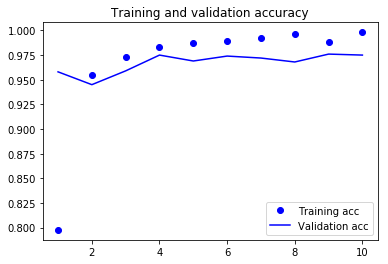

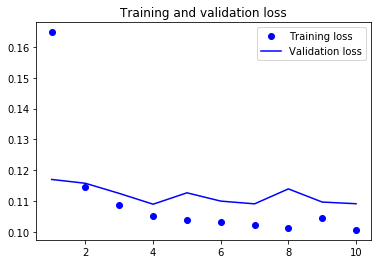

In [55]:
acc = history8.history['acc']
val_acc = history8.history['val_acc']
loss = history8.history['loss']
val_loss = history8.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [56]:
model9 = models.Sequential()
model9.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model9.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model9.add(layers.Dense(units= 64, activation='relu'))
model9.add(layers.Dense(units=10, activation='softmax'))

In [57]:
model9.compile(optimizer=optimizers.SGD(),
loss=losses.poisson,
metrics=['accuracy'])
history9 = model9.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 766us/step - loss: 0.3306 - acc: 0.1410 - val_loss: 0.3300 - val_acc: 0.1630
Epoch 2/10
6000/6000 [==============================] - 4s 660us/step - loss: 0.3297 - acc: 0.1973 - val_loss: 0.3291 - val_acc: 0.2240
Epoch 3/10
6000/6000 [==============================] - 4s 653us/step - loss: 0.3289 - acc: 0.2388 - val_loss: 0.3284 - val_acc: 0.2630
Epoch 4/10
6000/6000 [==============================] - 4s 654us/step - loss: 0.3283 - acc: 0.2743 - val_loss: 0.3278 - val_acc: 0.2820
Epoch 5/10
6000/6000 [==============================] - 4s 653us/step - loss: 0.3277 - acc: 0.2945 - val_loss: 0.3272 - val_acc: 0.3040
Epoch 6/10
6000/6000 [==============================] - 4s 652us/step - loss: 0.3271 - acc: 0.3122 - val_loss: 0.3266 - val_acc: 0.3200
Epoch 7/10
6000/6000 [==============================] - 4s 653us/step - loss: 0.3264 - acc: 0.3253 - val_loss: 0.3259 - val_acc: 0.3310


In [58]:
test_loss_le9, test_acc_le9 = model9.evaluate(X_test, X_test_labels)
test_acc_le9

1000/1000 [==============================] - 0s 310us/step


0.386

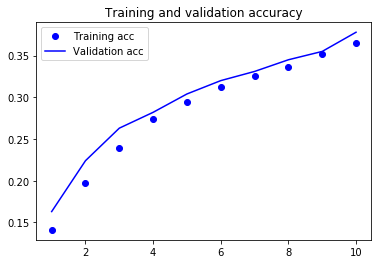

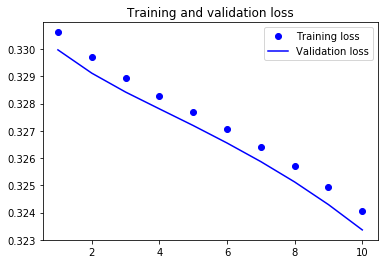

In [59]:
acc = history9.history['acc']
val_acc = history9.history['val_acc']
loss = history9.history['loss']
val_loss = history9.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Modelo 1 foi o melhor. Loss = mean_squared_logarithmic_error, optimizer = adagrad

In [10]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

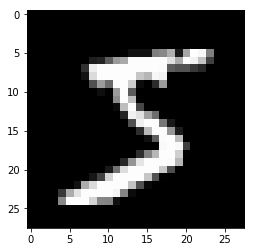

In [11]:
imgplot = plt.imshow(image.array_to_img(X_train[0]))
plt.show()

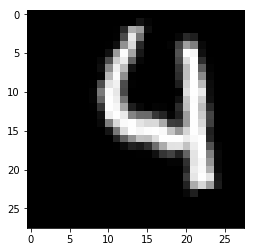

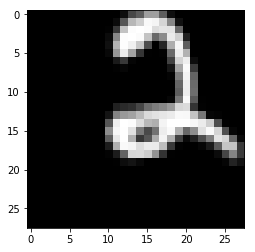

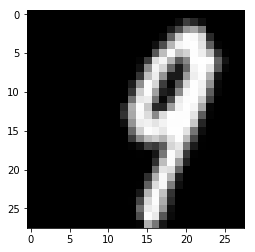

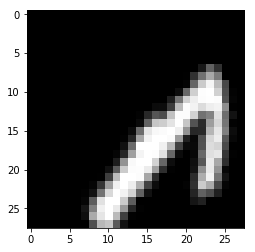

In [12]:
i = 0;
for batch in datagen.flow(X_train, batch_size=20):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Dropout = 0.3

In [36]:
modelf = models.Sequential()
modelf.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
modelf.add(layers.MaxPooling2D((2, 2)))
modelf.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
modelf.add(layers.MaxPooling2D((2, 2)))
modelf.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

modelf.add(layers.Flatten()) # Output_shape=(None, 3*3*64)

modelf.add(layers.Dropout(0.3))

modelf.add(layers.Dense(units= 64, activation='relu'))
modelf.add(layers.Dense(units=10, activation='softmax'))

In [39]:
modelf.compile(optimizer=optimizers.adagrad(),
loss=losses.mean_squared_logarithmic_error,
metrics=['accuracy'])

In [40]:
train_datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

historyf = modelf.fit_generator(datagen.flow(X_train, X_train_labels, batch_size=20), epochs=10, validation_data=(X_valid, X_valid_labels))
#Generate batches of tensor image data with real-time data augmentation. (6000/12 = 500)

Epoch 1/10
300/300 [==============================] - 7s 25ms/step - loss: 0.0279 - acc: 0.5695 - val_loss: 0.0124 - val_acc: 0.8390
Epoch 2/10
300/300 [==============================] - 7s 23ms/step - loss: 0.0231 - acc: 0.6490 - val_loss: 0.0106 - val_acc: 0.8560
Epoch 3/10
300/300 [==============================] - 8s 26ms/step - loss: 0.0209 - acc: 0.6902 - val_loss: 0.0109 - val_acc: 0.8360
Epoch 4/10
300/300 [==============================] - 8s 26ms/step - loss: 0.0199 - acc: 0.7082 - val_loss: 0.0111 - val_acc: 0.8320
Epoch 5/10
300/300 [==============================] - 8s 28ms/step - loss: 0.0190 - acc: 0.7238 - val_loss: 0.0103 - val_acc: 0.8660
Epoch 6/10
300/300 [==============================] - 8s 27ms/step - loss: 0.0181 - acc: 0.7385 - val_loss: 0.0086 - val_acc: 0.8880
Epoch 7/10
300/300 [==============================] - 9s 28ms/step - loss: 0.0174 - acc: 0.7430 - val_loss: 0.0076 - val_acc: 0.9030
Epoch 8/10
300/300 [==============================] - 9s 29ms/step - 

In [41]:
test_lossf, test_accf = modelf.evaluate(X_test, X_test_labels)
test_accf

1000/1000 [==============================] - 0s 376us/step


0.85

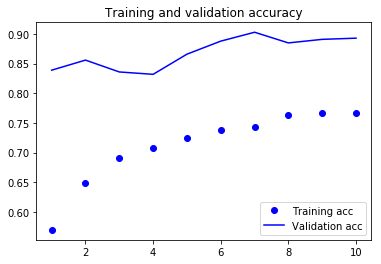

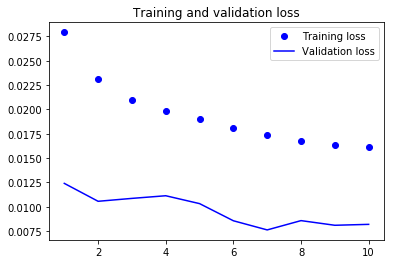

In [42]:
acc = historyf.history['acc']
val_acc = historyf.history['val_acc']
loss = historyf.history['loss']
val_loss = historyf.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## p=0.4

In [43]:
modelf_1 = models.Sequential()
modelf_1.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
modelf_1.add(layers.MaxPooling2D((2, 2)))
modelf_1.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
modelf_1.add(layers.MaxPooling2D((2, 2)))
modelf_1.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

modelf_1.add(layers.Flatten()) # Output_shape=(None, 3*3*64)

modelf_1.add(layers.Dropout(0.4))

modelf_1.add(layers.Dense(units= 64, activation='relu'))
modelf_1.add(layers.Dense(units=10, activation='softmax'))

In [44]:
modelf_1.compile(optimizer=optimizers.adagrad(),
loss=losses.mean_squared_logarithmic_error,
metrics=['accuracy'])

In [45]:
train_datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

historyf_1 = modelf_1.fit_generator(datagen.flow(X_train, X_train_labels, batch_size=20), epochs=5, validation_data=(X_valid, X_valid_labels))
#Generate batches of tensor image data with real-time data augmentation. (6000/12 = 500)

Epoch 1/5
300/300 [==============================] - 8s 27ms/step - loss: 0.0398 - acc: 0.2712 - val_loss: 0.0278 - val_acc: 0.5730
Epoch 2/5
300/300 [==============================] - 7s 24ms/step - loss: 0.0330 - acc: 0.4548 - val_loss: 0.0177 - val_acc: 0.7850
Epoch 3/5
300/300 [==============================] - 8s 26ms/step - loss: 0.0292 - acc: 0.5288 - val_loss: 0.0153 - val_acc: 0.7940
Epoch 4/5
300/300 [==============================] - 8s 27ms/step - loss: 0.0269 - acc: 0.5853 - val_loss: 0.0136 - val_acc: 0.8100
Epoch 5/5
300/300 [==============================] - 8s 27ms/step - loss: 0.0255 - acc: 0.6020 - val_loss: 0.0125 - val_acc: 0.8440


In [46]:
test_lossf_1, test_accf_1 = modelf_1.evaluate(X_test, X_test_labels)
test_accf_1

1000/1000 [==============================] - 0s 354us/step


0.805

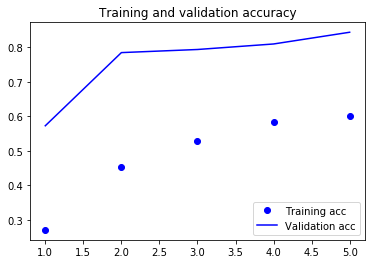

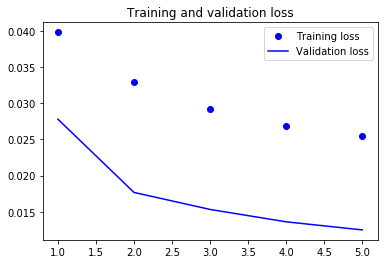

In [47]:
acc = historyf_1.history['acc']
val_acc = historyf_1.history['val_acc']
loss = historyf_1.history['loss']
val_loss = historyf_1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## p=0.5

In [48]:
modelf_2 = models.Sequential()
modelf_2.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
modelf_2.add(layers.MaxPooling2D((2, 2)))
modelf_2.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
modelf_2.add(layers.MaxPooling2D((2, 2)))
modelf_2.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

modelf_2.add(layers.Flatten()) # Output_shape=(None, 3*3*64)

modelf_2.add(layers.Dropout(0.3))

modelf_2.add(layers.Dense(units= 64, activation='relu'))
modelf_2.add(layers.Dense(units=10, activation='softmax'))

In [49]:
modelf_2.compile(optimizer=optimizers.adagrad(),
loss=losses.mean_squared_logarithmic_error,
metrics=['accuracy'])

In [50]:
train_datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

historyf_2 = modelf_2.fit_generator(datagen.flow(X_train, X_train_labels, batch_size=20), epochs=5, validation_data=(X_valid, X_valid_labels))
#Generate batches of tensor image data with real-time data augmentation. (6000/12 = 500)

Epoch 1/5
300/300 [==============================] - 7s 25ms/step - loss: 0.0422 - acc: 0.1880 - val_loss: 0.0356 - val_acc: 0.3740
Epoch 2/5
300/300 [==============================] - 8s 26ms/step - loss: 0.0359 - acc: 0.3807 - val_loss: 0.0244 - val_acc: 0.6550
Epoch 3/5
300/300 [==============================] - 8s 28ms/step - loss: 0.0306 - acc: 0.5075 - val_loss: 0.0167 - val_acc: 0.7770
Epoch 4/5
300/300 [==============================] - 8s 28ms/step - loss: 0.0269 - acc: 0.5873 - val_loss: 0.0139 - val_acc: 0.8200
Epoch 5/5
300/300 [==============================] - 8s 28ms/step - loss: 0.0248 - acc: 0.6250 - val_loss: 0.0124 - val_acc: 0.8280


In [51]:
test_lossf_2, test_accf_2 = modelf_2.evaluate(X_test, X_test_labels)
test_accf_2

1000/1000 [==============================] - 0s 362us/step


0.829

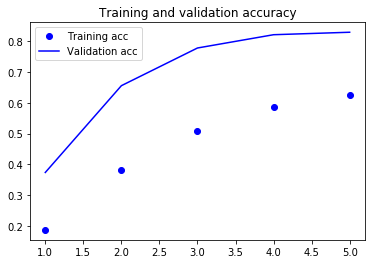

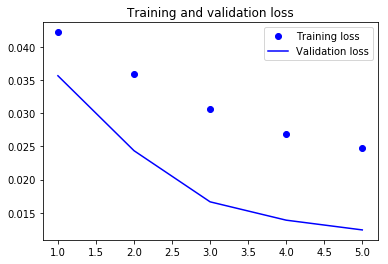

In [52]:
acc = historyf_2.history['acc']
val_acc = historyf_2.history['val_acc']
loss = historyf_2.history['loss']
val_loss = historyf_2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()